In [42]:
from swp import *
from collections import defaultdict
from collections import namedtuple
import matplotlib.pyplot as plt

In [34]:
with open("edges.txt") as f:
    lines = f.readlines()
edges = []
adjacency_list = defaultdict(list)
for line in lines:
    verts = line.split()
    if len(verts)!=2:
        raise ValueError("Edge cannot have more or less than vertices.")
    verts = int(verts[0]), int(verts[1])
    adjacency_list[verts[0]].append(verts[1])
    adjacency_list[verts[1]].append(verts[0])
    edges.append(verts)
# return (edges, d)

In [38]:
q = MyQueue()
s = 100
q.enqueue(s)
unique_verts = list(adjacency_list.keys())
vertex_attributes = defaultdict(list,{ k:[] for k in unique_verts }) #for tracking discovery status, distance from source, predecessor vertex
visited = set()
vertex_distances = {}
vertex_distances[s] = 0


In [39]:
while not q.empty():
    vertex = q.dequeue()
    visited.add(vertex)
    for i in adjacency_list[vertex]:
        if i not in visited:
            q.enqueue(i)
            vertex_distances[i] = vertex_distances[vertex] + 1

(array([ 906., 1217.,  688.,  678.,  175.,   89.,  124.,   90.,   40.,
          32.]),
 array([  0. ,  12.9,  25.8,  38.7,  51.6,  64.5,  77.4,  90.3, 103.2,
        116.1, 129. ]),
 <BarContainer object of 10 artists>)

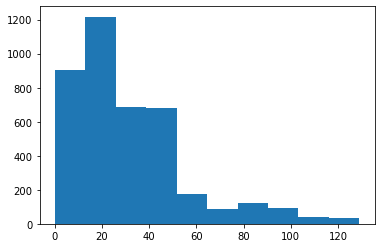

In [44]:
plt.hist(vertex_distances.values())